In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Naive_Bayes_Dataset_COVID.csv")
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# changing the catagorical values into numerical values
no_encoded = le.fit_transform(df["no"])
pc_encoded = le.fit_transform(df["pc"])
wbc_encoded = le.fit_transform(df["wbc"])
mc_encoded = le.fit_transform(df["mc"])
ast_encoded = le.fit_transform(df["ast"])
bc_encoded = le.fit_transform(df["bc"])
ldh_encoded = le.fit_transform(df["ldh"])
diagnosis_encoded = le.fit_transform(df["diagnosis"])

# creating the datafram for the same
x = np.array(list(zip(no_encoded,pc_encoded,wbc_encoded,mc_encoded,ast_encoded, bc_encoded, ldh_encoded)))
y = diagnosis_encoded

print(x, y)

[[ 0  1  1  1  0  1  1]
 [ 1  1  1  2  0  1  0]
 [ 2  1  0  2  0  1  1]
 [ 3  1  0  2  0  0  1]
 [ 4  1  2  0  0  1  1]
 [ 5  1  2  2  0  1  0]
 [ 6  2  1  1  0  1  1]
 [ 7  2  0  2  0  1  1]
 [ 8  2  0  2  0  0  0]
 [ 9  2  2  0  0  1  1]
 [10  2  2  0  0  1  0]
 [11  0  1  1  1  1  1]
 [12  0  2  0  1  1  1]
 [13  0  2  0  1  0  0]
 [14  0  0  2  1  1  0]
 [15  1  2  0  0  0  1]
 [16  2  2  0  0  0  1]
 [17  0  1  1  1  1  0]
 [18  2  2  2  0  1  1]
 [19  2  0  2  0  1  0]
 [20  2  1  2  0  1  0]
 [21  1  0  2  0  0  0]
 [22  1  1  1  0  0  0]
 [23  0  0  2  1  1  1]
 [24  0  2  2  1  1  1]] [1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [12]:
# spliting the data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
# creating the classifier model and training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [14]:
# printing the accuracy score and classification report
from sklearn.metrics import classification_report, roc_curve

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [18]:
# probability of correct classification
lr_probs = model.predict_proba(x_test)

# keeping only postive predictions
lr_probs = lr_probs[:, 1]

# calculating fpr and tpr
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

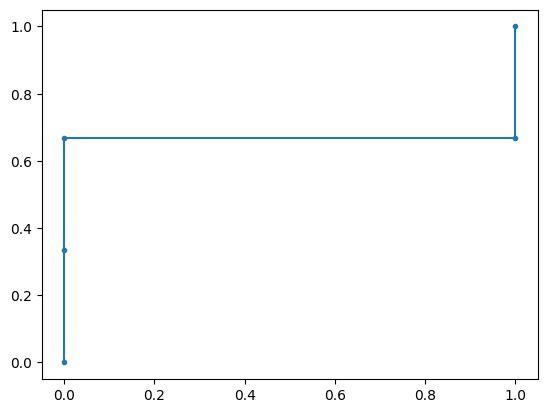

In [22]:
# plotting the curve
import matplotlib.pyplot as plt

plt.plot(lr_fpr, lr_tpr, marker=".")